In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
sampleNo = 20
# First group
mu0 = np.array([[-2, 2]])
Sigma0 = np.array([[2, 0], [0, 3]])
R0 = np.linalg.cholesky(Sigma0)
s0 = np.dot(np.random.randn(sampleNo, 2), R0) + mu0
# Second group
mu1 = np.array([[3, -2]])
Sigma1 = np.array([[1, 0], [0, 4]])
R1 = np.linalg.cholesky(Sigma1)
s1 = np.dot(np.random.randn(sampleNo, 2), R1) + mu1

In [12]:
from pandas import DataFrame
if s0.shape[1] == 2:
    s0 = np.insert(s0, 2, values=1, axis=1) # Add a column of tag values
if s1.shape[1] == 2:
    s1 = np.insert(s1, 2, values=0, axis=1) # Add a column of tag values
s = np.concatenate((s0,s1),axis=0) # concatenate the two groups
df = DataFrame(s, columns=['x1','x2','y'])
df

,x1,x2,y
0,-1.454954,1.297060,1.0
1,-0.721047,-0.047935,1.0
2,-3.469280,3.374216,1.0
3,-4.755525,5.015323,1.0
4,-0.661303,-1.610062,1.0
5,-4.303447,3.263790,1.0
6,-2.139664,3.269159,1.0
7,-3.346296,1.327046,1.0
8,-2.223608,1.043012,1.0
9,0.589495,3.102872,1.0


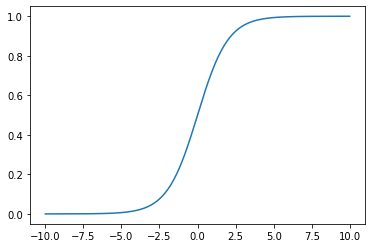

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
x = np.arange(-10,10,0.01) 
plt.plot(x,sigmoid(x)) 
plt.show()

In [13]:
w1 = -2
w2 = 1
b = 0
loss = 100000
epoch = 0
while True:
    if(epoch%20==0):
        print("epoch:", epoch)
        print("w1:%.2f, w2:%.2f"%(w1,w2))
    lastloss = loss
    loss = 0
    partialw1 = 0
    partialw2 = 0
    for k in range(2*sampleNo):
        yhat = sigmoid(w1*s[k,0]+w2*s[k,1]+b)
        y = s[k,2]
        loss += (yhat-y)*(yhat-y)
        partialw1 += 2*(yhat-y)*yhat*(1-yhat)*s[k,0]
        partialw2 += 2*(yhat-y)*yhat*(1-yhat)*s[k,1]
    if(epoch%100==0):
        print("loss:", loss)
    if(lastloss<loss):
        break
    w1 = w1 - 0.1 * partialw1
    w2 = w2 - 0.1 * partialw2
    epoch = epoch+1
    if(epoch>1000):
        break
    if(loss<0.1):
        break
print("epoch:", epoch)
print("w1:%.2f, w2:%.2f"%(w1,w2))
print("loss:", loss)

epoch: 0
w1:-2.00, w2:1.00
loss: 0.39078246167055947
epoch: 20
w1:-2.32, w2:0.78
epoch: 40
w1:-2.55, w2:0.83
epoch: 60
w1:-2.75, w2:0.87
epoch: 80
w1:-2.93, w2:0.91
epoch: 100
w1:-3.09, w2:0.95
loss: 0.21507405641660163
epoch: 120
w1:-3.24, w2:0.99
epoch: 140
w1:-3.38, w2:1.02
epoch: 160
w1:-3.52, w2:1.05
epoch: 180
w1:-3.64, w2:1.08
epoch: 200
w1:-3.76, w2:1.11
loss: 0.16756673459262847
epoch: 220
w1:-3.87, w2:1.14
epoch: 240
w1:-3.98, w2:1.17
epoch: 260
w1:-4.09, w2:1.19
epoch: 280
w1:-4.19, w2:1.22
epoch: 300
w1:-4.28, w2:1.24
loss: 0.13866236455672373
epoch: 320
w1:-4.37, w2:1.26
epoch: 340
w1:-4.46, w2:1.29
epoch: 360
w1:-4.55, w2:1.31
epoch: 380
w1:-4.64, w2:1.33
epoch: 400
w1:-4.72, w2:1.35
loss: 0.1183859968674391
epoch: 420
w1:-4.80, w2:1.37
epoch: 440
w1:-4.88, w2:1.39
epoch: 460
w1:-4.95, w2:1.41
epoch: 480
w1:-5.02, w2:1.43
epoch: 500
w1:-5.10, w2:1.45
loss: 0.10312879683847777
epoch: 520
w1:-5.17, w2:1.47
epoch: 526
w1:-5.19, w2:1.47
loss: 0.09987538829570573


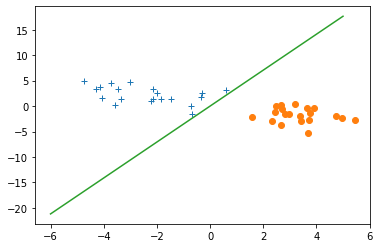

In [14]:
w1 = -5.19
w2 = 1.47
b = 0
x1 = np.arange(-6, 6) 
x2 = (-w1 * x1 -  b) / w2
plt.plot(s0[:, 0], s0[:, 1], '+')
plt.plot(s1[:, 0], s1[:, 1], 'o')
plt.plot(x1, x2) 
plt.show()

In [16]:
w1 = -5.19
w2 = 1.47
b = 0
loss = 100000
epoch = 0
while True:
    if(epoch%20==0):
        print("epoch:", epoch)
        print("w1:%.2f, w2:%.2f"%(w1,w2))
    lastloss = loss
    loss = 0
    partialw1 = 0
    partialw2 = 0
    for k in range(2*sampleNo):
        yhat = sigmoid(w1*s[k,0]+w2*s[k,1]+b)
        y = s[k,2]
        loss += (yhat-y)*(yhat-y)
        partialw1 += 2*(yhat-y)*yhat*(1-yhat)*s[k,0]
        partialw2 += 2*(yhat-y)*yhat*(1-yhat)*s[k,1]
    if(epoch%100==0):
        print("loss:", loss)
    if(lastloss<loss):
        break
    w1 = w1 - 0.1 * partialw1
    w2 = w2 - 0.1 * partialw2
    epoch = epoch+1
    if(epoch>1000):
        break
    if(loss<0.1):
        break
print("epoch:", epoch)
print("w1:%.2f, w2:%.2f"%(w1,w2))
print("loss:", loss)

epoch: 0
w1:-5.19, w2:1.47
loss: 0.09966643846577483
epoch: 1
w1:-5.19, w2:1.47
loss: 0.09966643846577483


Modifying the parameters with the precedent parameters value that give the min loss allow the fast convergence. Here with only two tries I classified my data.